--- Data Head ---
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


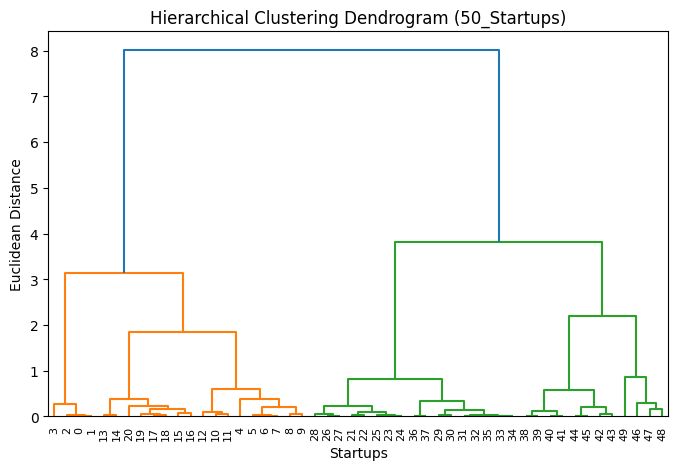


--- Clustered Data ---
      Profit  Cluster
0  192261.83        1
1  191792.06        1
2  191050.39        1
3  182901.99        1
4  166187.94        1

Cluster-wise Average Profit:
Cluster
1    149605.103333
2    101580.121176
3     61005.227500
Name: Profit, dtype: float64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

df = pd.read_csv("50_Startups.csv")
print("--- Data Head ---")
print(df.head())

if 'State' in df.columns:
    le = LabelEncoder()
    df['State'] = le.fit_transform(df['State'])

df.fillna(df.mean(numeric_only=True), inplace=True)

X = df[['Profit']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (50_Startups)")
plt.xlabel("Startups")
plt.ylabel("Euclidean Distance")
plt.show()

clusters = fcluster(Z, t=3, criterion='maxclust')
df['Cluster'] = clusters

print("\n--- Clustered Data ---")
print(df[['Profit', 'Cluster']].head())

print("\nCluster-wise Average Profit:")
print(df.groupby('Cluster')['Profit'].mean())
